**Imports and workspace setting**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
plt.style.use('ggplot')

**Loading data file**

In [35]:
cancerData = pd.read_csv('../data/breast-cancer-wisconsin.data', header=None)
cancerData.drop(cancerData.columns[0],axis=1,inplace=True)
cancerData = cancerData.replace('?', np.nan)
cancerData.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


**Stats of the data**

In [36]:
cancerData.shape

(699, 10)

**Class distribution of benign (2) and malignant (4)**

Class distribution is skewed towards benign.

Text(0.5, 0, 'Class')

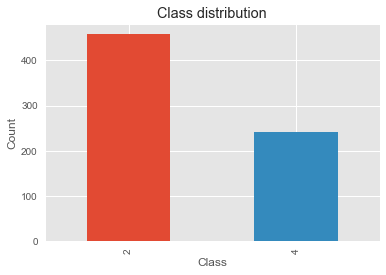

In [51]:
fig, ax = plt.subplots(figsize=(6,4))
axes = cancerData[10].value_counts().plot(kind='bar', title='Class distribution')
axes.set_ylabel('Count')
axes.set_xlabel('Class')

**Drop missing values (16 values with ? mark)**

In [38]:
cancerDataAfterMissingValuesDropped = cancerData.dropna()
cancerDataAfterMissingValuesDropped.shape

(683, 10)

In [39]:
y = cancerDataAfterMissingValuesDropped.values[:,-1]
y=y.astype('int')
y.shape

(683,)

In [40]:
X = cancerDataAfterMissingValuesDropped.values[:,:-1]
X=X.astype('int')
X.shape

(683, 9)

**Holdout to create training (65%) and testing (35%) dataset**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=8)
print (str(X_train.shape) +","+ str(y_train.shape))
print (str(X_test.shape) +","+ str(y_test.shape))

(443, 9),(443,)
(240, 9),(240,)


**Fit Random forest model**

In [42]:
randomForest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
predictions = randomForest.predict(X_test)

In [44]:
score = randomForest.score(X_test, y_test)
print('Accuracy score = ', score)

Accuracy score =  0.975


**Classification report**

In [45]:
target_names = ['2 (benign)', '4 (malignant)']
print(metrics.classification_report(y_test,predictions, target_names=target_names, digits=3))

               precision    recall  f1-score   support

   2 (benign)      0.973     0.986     0.980       147
4 (malignant)      0.978     0.957     0.967        93

    micro avg      0.975     0.975     0.975       240
    macro avg      0.976     0.972     0.974       240
 weighted avg      0.975     0.975     0.975       240



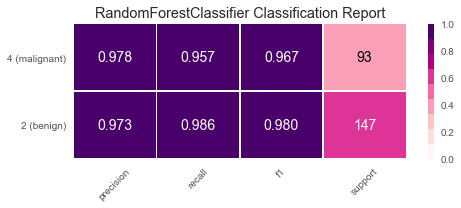

In [46]:
fig, ax = plt.subplots(figsize=(7,3))
visualizer = ClassificationReport(randomForest, classes=target_names, support=True, cmap='RdPu')
visualizer.score(X_test, y_test)
for label in visualizer.ax.texts:
    label.set_size(14)
g = visualizer.poof()

**Confusion metrix**

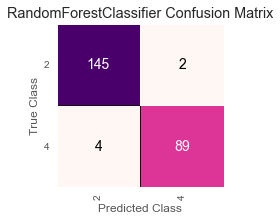

In [47]:
fig, ax = plt.subplots(figsize=(3,3))
cm = ConfusionMatrix(randomForest, classes=[2,4], cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(14)
cm.poof()

**Conclusion**
01. Model works really well and provides 97.5% accuracy.
02. Adjesting probability thresholds using class_weight='balanced' were done to resolve the class skewness problem. Skewed class problem is seen in most practical scenarios.